# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading MNIST dataset from tensorflow

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
X_train = X_train.flatten().reshape(60000,784)
X_test =  X_test.flatten().reshape(10000,784)

In [6]:
def displayimage(image,label):
    image = image.reshape(28,28)
    plt.imshow(image)
    plt.title(f"Image Representation for {label}")
    plt.show()

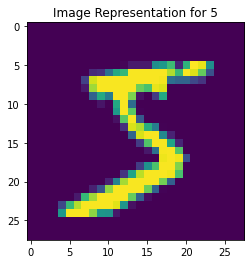

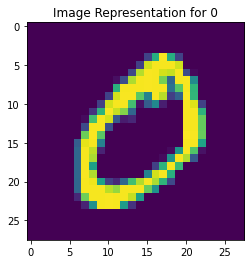

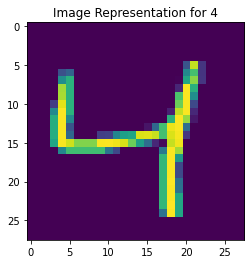

In [7]:
for i in range(3):
    displayimage(X_train[i],y_train[i])

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_model = LogisticRegression()

In [10]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [11]:
Logistic_predictions = log_model.predict(X_test)

In [12]:
Logistic_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [18]:
Logistic_confusionMatrix = confusion_matrix(y_test,Logistic_predictions)
Logistic_confusionMatrix

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]],
      dtype=int64)

In [19]:
Logistic_ClassificationReport = pd.DataFrame(classification_report(y_test, Logistic_predictions, output_dict=True)).T
Logistic_ClassificationReport

,precision,recall,f1-score,support
0,0.954410,0.982653,0.968326,980.0000
1,0.967798,0.979736,0.973730,1135.0000
2,0.929719,0.897287,0.913215,1032.0000
3,0.903353,0.906931,0.905138,1010.0000
4,0.934292,0.926680,0.930470,982.0000
5,0.903376,0.869955,0.886351,892.0000
6,0.943005,0.949896,0.946438,958.0000
7,0.931440,0.925097,0.928258,1028.0000
8,0.867265,0.892197,0.879555,974.0000
9,0.911968,0.913776,0.912871,1009.0000


In [23]:
accuracy_score(y_test, Logistic_predictions)

0.9255

# Support Vector Classification

In [24]:
from sklearn.svm import LinearSVC

In [25]:
SVC_Model = LinearSVC()
SVC_Model.fit(X_train, y_train)

LinearSVC()

In [26]:
SVC_Predictions = SVC_Model.predict(X_test)

In [27]:
SVC_confusionMatrix = confusion_matrix(y_test,SVC_Predictions)
SVC_confusionMatrix

array([[ 924,    0,   11,    2,    4,   27,    6,    3,    2,    1],
       [   0, 1107,   19,    0,    1,    4,    3,    0,    0,    1],
       [   2,   17,  954,    3,   13,   20,   11,    3,    8,    1],
       [   7,    5,   69,  732,    5,  160,    2,    8,   10,   12],
       [   0,    2,   11,    1,  925,    2,    8,    2,    4,   27],
       [   8,    1,   14,    9,   10,  820,    9,    3,   10,    8],
       [   9,    2,   22,    1,    6,   53,  864,    1,    0,    0],
       [   0,   13,   40,    6,   25,    9,    0,  861,    2,   72],
       [   6,   29,   49,   23,   23,  355,   11,    5,  436,   37],
       [   3,   10,    5,    8,   75,   34,    0,   17,    1,  856]],
      dtype=int64)

In [28]:
SVC_ClassificationReport = pd.DataFrame(classification_report(y_test, SVC_Predictions, output_dict=True)).T
SVC_ClassificationReport

,precision,recall,f1-score,support
0,0.963504,0.942857,0.953069,980.0000
1,0.933390,0.975330,0.953899,1135.0000
2,0.798995,0.924419,0.857143,1032.0000
3,0.932484,0.724752,0.815599,1010.0000
4,0.850966,0.941955,0.894152,982.0000
5,0.552561,0.919283,0.690236,892.0000
6,0.945295,0.901879,0.923077,958.0000
7,0.953488,0.837549,0.891766,1028.0000
8,0.921776,0.447639,0.602626,974.0000
9,0.843350,0.848365,0.845850,1009.0000


In [29]:
accuracy_score(y_test, SVC_Predictions)

0.8479

# KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
KNN_Predictions = KNN_Model.predict(X_test)

In [33]:
KNN_confusionMatrix = confusion_matrix(y_test,KNN_Predictions)
KNN_confusionMatrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [34]:
KNN_ClassificationReport = pd.DataFrame(classification_report(y_test, KNN_Predictions, output_dict=True)).T
KNN_ClassificationReport

,precision,recall,f1-score,support
0,0.963403,0.993878,0.978403,980.0000
1,0.954507,0.998238,0.975883,1135.0000
2,0.982161,0.960271,0.971093,1032.0000
3,0.964427,0.966337,0.965381,1010.0000
4,0.976215,0.961303,0.968702,982.0000
5,0.965286,0.966368,0.965826,892.0000
6,0.981308,0.986430,0.983863,958.0000
7,0.961089,0.961089,0.961089,1028.0000
8,0.988095,0.937372,0.962065,974.0000
9,0.956262,0.953419,0.954839,1009.0000


In [35]:
accuracy_score(y_test, KNN_Predictions)

0.9688

# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
DT_Predictions = DT_Model.predict(X_test)

In [39]:
DT_confusionMatrix = confusion_matrix(y_test,DT_Predictions)
DT_confusionMatrix

array([[ 915,    1,    8,   10,    4,   12,   10,    5,    8,    7],
       [   3, 1090,    8,    3,    4,    6,    5,    3,   11,    2],
       [  11,   11,  880,   38,   12,    9,   15,   25,   26,    5],
       [   4,    4,   25,  873,    8,   44,    3,    7,   25,   17],
       [   4,    4,    8,    5,  869,    8,   14,    6,   20,   44],
       [  16,   10,    4,   43,    7,  748,   23,    5,   22,   14],
       [  21,    3,   10,    9,   23,   25,  838,    0,   23,    6],
       [   2,    9,   28,   17,    6,    2,    3,  930,    8,   23],
       [  12,    7,   25,   37,   22,   32,   17,   11,  781,   30],
       [  12,    3,    7,   22,   41,   10,    7,   20,   23,  864]],
      dtype=int64)

In [40]:
DT_ClassificationReport = pd.DataFrame(classification_report(y_test, DT_Predictions, output_dict=True)).T
DT_ClassificationReport

,precision,recall,f1-score,support
0,0.915000,0.933673,0.924242,980.0000
1,0.954466,0.960352,0.957400,1135.0000
2,0.877368,0.852713,0.864865,1032.0000
3,0.825922,0.864356,0.844702,1010.0000
4,0.872490,0.884929,0.878665,982.0000
5,0.834821,0.838565,0.836689,892.0000
6,0.896257,0.874739,0.885367,958.0000
7,0.918972,0.904669,0.911765,1028.0000
8,0.824710,0.801848,0.813118,974.0000
9,0.853755,0.856293,0.855022,1009.0000


In [41]:
accuracy_score(y_test,DT_Predictions)

0.8788

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF_Model = RandomForestClassifier()
RF_Model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
RF_Predictions = RF_Model.predict(X_test)

In [45]:
RF_confusionMatrix = confusion_matrix(y_test,RF_Predictions)
RF_confusionMatrix

array([[ 969,    0,    0,    0,    0,    2,    4,    1,    4,    0],
       [   0, 1126,    2,    1,    0,    2,    2,    0,    1,    1],
       [   6,    0, 1000,    5,    3,    0,    4,    8,    6,    0],
       [   0,    0,    9,  972,    0,    8,    0,   10,    7,    4],
       [   1,    0,    0,    0,  955,    0,    5,    0,    3,   18],
       [   3,    0,    0,   14,    2,  859,    7,    2,    3,    2],
       [   6,    3,    0,    0,    4,    4,  938,    0,    3,    0],
       [   1,    2,   21,    0,    0,    1,    0,  991,    1,   11],
       [   4,    0,    6,    6,    5,    7,    2,    4,  931,    9],
       [   5,    4,    2,   12,   11,    3,    1,    3,    6,  962]],
      dtype=int64)

In [46]:
RF_ClassificationReport = pd.DataFrame(classification_report(y_test, RF_Predictions, output_dict=True)).T
RF_ClassificationReport

,precision,recall,f1-score,support
0,0.973869,0.988776,0.981266,980.0000
1,0.992070,0.992070,0.992070,1135.0000
2,0.961538,0.968992,0.965251,1032.0000
3,0.962376,0.962376,0.962376,1010.0000
4,0.974490,0.972505,0.973496,982.0000
5,0.969526,0.963004,0.966254,892.0000
6,0.974039,0.979123,0.976575,958.0000
7,0.972522,0.964008,0.968246,1028.0000
8,0.964767,0.955852,0.960289,974.0000
9,0.955313,0.953419,0.954365,1009.0000


In [47]:
accuracy_score(y_test,RF_Predictions)

0.9703

# Convolutional Neural Network

In [48]:
X_train.shape

(60000, 784)

In [49]:
X_train = X_train.reshape(60000,28,28,1)

In [50]:
X_test = X_test.reshape(10000,28,28,1)

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_cat_train = to_categorical(y_train)

In [54]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [55]:
y_cat_test = to_categorical(y_test)

In [56]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [58]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [60]:
model.fit(X_train,y_cat_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3193 - accuracy: 0.9475
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0717 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0567 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0380 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0306 - accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0306 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0281 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0218 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [61]:
CNN_Predictions = model.predict(X_test)
CNN_Predictions = list(map(lambda i: np.argmax(i),CNN_Predictions))

313/313 [==============================] - 1s 4ms/step


In [62]:
CNN_confusionMatrix = confusion_matrix(y_test, CNN_Predictions)
CNN_confusionMatrix

array([[ 972,    0,    2,    0,    0,    0,    3,    0,    0,    3],
       [   2, 1115,   10,    2,    0,    0,    1,    1,    4,    0],
       [   2,    4, 1021,    1,    0,    0,    1,    2,    1,    0],
       [   0,    0,    0,  999,    0,    4,    0,    4,    3,    0],
       [   1,    0,    3,    0,  971,    0,    3,    0,    1,    3],
       [   3,    1,    0,   11,    0,  869,    3,    0,    3,    2],
       [   9,    4,    0,    2,    1,    5,  936,    0,    1,    0],
       [   0,    3,   12,    1,    5,    0,    0, 1001,    3,    3],
       [   5,    2,    4,    4,    3,    1,    0,    4,  945,    6],
       [   2,    5,    1,    2,   11,    3,    0,    4,    4,  977]],
      dtype=int64)

In [63]:
CNN_ClassificationReport = pd.DataFrame(classification_report(y_test, CNN_Predictions, output_dict=True)).T
CNN_ClassificationReport

,precision,recall,f1-score,support
0,0.975904,0.991837,0.983806,980.0000
1,0.983245,0.982379,0.982812,1135.0000
2,0.969611,0.989341,0.979376,1032.0000
3,0.977495,0.989109,0.983268,1010.0000
4,0.979818,0.988798,0.984288,982.0000
5,0.985261,0.974215,0.979707,892.0000
6,0.988384,0.977035,0.982677,958.0000
7,0.985236,0.973735,0.979452,1028.0000
8,0.979275,0.970226,0.974729,974.0000
9,0.982897,0.968285,0.975537,1009.0000


In [64]:
accuracy_score(y_test,CNN_Predictions)

0.9806

CNN with Lenet-5 Architecture predicted better

# Thank You